# Introduction to Machine Learning via Nearest Neighbours


## Part 1 - Implement k-Nearest Neighbours (kNN) - 30 points

### Note:
This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see references below). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get familiar with a **non-parapmetric** learning algorithm called k-Nearest Neighbours (kNN), and will implement it. You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

For this exercise we will use hypothetical and artificial generated data.
### Nearest Neighbours
The kNN algorithm is simple - given a labeled sample set data, and a new sample, predict the label of this sample by using majority vote (or averaging) over the labels of the k-nearest neighbour of the new data in the sample set.

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either 0 or 1.

Implement a class called KNNClassifier and two methods:
- `fit`: should recieve the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]).
- `predict`: should recieve a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).

Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set.

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.

* Bonus for nurdes: use kd-tree for efficiency, see [nearest neighbour search in wiki](https://en.wikipedia.org/wiki/Nearest_neighbor_search)

* Bonus for lazy nurdes: use [scipy's kd implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html)

In [8]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random

In [1]:
class kNNClassifier_vec:
  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors


  def fit(self, X, y):
    self.X_train = np.array(X)
    self.y_train = np.array(y)


  def predict(self, X):
    X_test = np.array(X)

    # Calculate pairwise Euclidean distances
    distances = np.linalg.norm(self.X_train[:, np.newaxis, :] - X_test, axis=2)

    # Find indices of k-nearest neighbors for each test sample
    nearest_neighbors_indices = np.argsort(distances, axis=0)[:self.n_neighbors, :]
    

    # Get labels of the k-nearest neighbors
    k_labels = self.y_train[nearest_neighbors_indices]
    

    # Find the majority voted label for each test sample
    #predicted_labels = np.median(nearest_labels,axis=0).astype(int)

    # Get moda from k_labels
    most_common = np.array([Counter(sorted(row, reverse=True)).most_common(1)[0][0] for row in k_labels.T])


    return most_common

In [3]:
k1 = kNNClassifier_vec(3)

In [4]:
k1.fit([[1,2],[2,1],[5,6], [7,8]],['r', 'r', 'b', 'b'])

In [5]:
k1.predict([[2,2], [6, 6]])

array(['r', 'b'], dtype='<U1')

In [6]:
kv1 = kNNClassifier_vec(3)
kv1.fit([[1,2],[2,1],[5,6], [7,8]],['r', 'r', 'b', 'b'])
kv1.predict([[2,2], [6, 6]])

array(['r', 'b'], dtype='<U1')

## Part 2 - Learn and evaluate kNN algorithm on artificial data

kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set (or maybe you could say that the number of parameters increases with the size of the sample set). However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value for it, is choosing the balance between bias and variance as discussed in class.




### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.

In [34]:
def true_boundary_voting_pred(wealth, religiousness):
  return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m, seed=150):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed)

  X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
  y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
  y[y==0] = 1
  samples_to_flip = np.random.randint(0,m//10)
  flip_ind = np.random.choice(m, samples_to_flip, replace=False)
  y[flip_ind] = -y[flip_ind]
  return X, y

def plot_labeled_data(X, y, no_titles=False):
  republicans = (y==1)
  democrats = (y==-1)
  plt.scatter(X[republicans,0], X[republicans,1], c='r')
  plt.scatter(X[democrats,0], X[democrats,1], c='b')
  if not no_titles:
    plt.xlabel('Wealth')
    plt.ylabel('Religiousness')
    plt.title('Red circles represent Republicans, Blues Democrats')

  plt.xlim([0, 10]);
  plt.ylim([0, 10]);
  plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

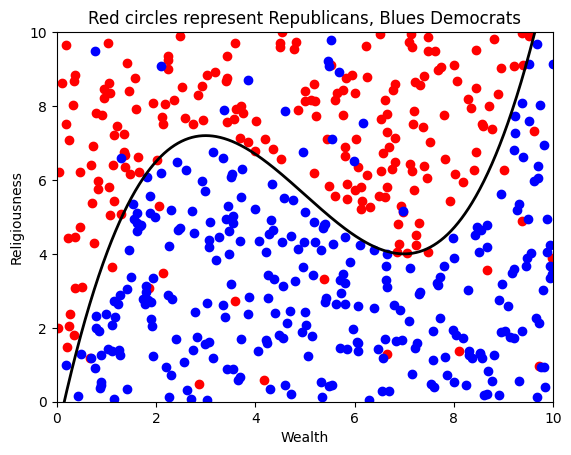

In [35]:
# Play this several times to see different sampling sets
X, y = generate_data(m=500)
plot_labeled_data(X, y)


### 1. Analyse the properties of kNN - 30 points
Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like this:

![decision plane](https://doc-14-14-docs.googleusercontent.com/docs/securesc/flg80o8vb463a3nd3i6da8hemig5me1b/hvii8ll4dscju8o17vuo2aab9aei8hgr/1543334400000/11934753179242311747/03422859225809857490/1chmyojft_R6ftfBhoPZuGN9AykyUS-cw?e=view&nonce=4i4j8lssjk6kc&user=03422859225809857490&hash=k9ogjg94ssot1vocu8uoeg4okkeekg6f)

https://drive.google.com/file/d/1chmyojft_R6ftfBhoPZuGN9AykyUS-cw/view?usp=sharing

Answer the following questions:
- How is the decision plain affected from changes in the sample set, as a function of k?
- Can you describe when do you underfit or overfit the data?
- How does the complexity of this model depends on k?

* Bonus for nurdes:
Use interactive slider for k to see the effect [see [interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)]

In [36]:
X, y = generate_data(m=500)

In [37]:
from ipywidgets import interact, widgets

def plot_decision_plane(X, y, classifier, no_titles=False):
    republicans = (y == 1)
    democrats = (y == -1)

    plt.xlim([0, 10])
    plt.ylim([0, 10])

    # Generate a meshgrid for the decision plane
    xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict the class for each point in the meshgrid
    predictions = classifier.predict(grid_points)

    # Use hexbin to create the decision plane with hexagons colored by the predicted class
    plt.hexbin(grid_points[:, 0], grid_points[:, 1], C=predictions, gridsize=25, cmap='coolwarm', edgecolors='face', alpha=0.8)

    plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

def visualize_knn(k):
    plt.figure(figsize=(12, 5))
    
    knn = kNNClassifier_vec(k)
    knn.fit(X, y)
    y_pred = knn.predict(X)

    plt.subplot(1, 2, 2)
    plot_decision_plane(X, y_pred, knn)
    plt.title(f'k = {k}')

    plt.subplot(1, 2, 1)
    plot_labeled_data(X, y)
    plt.title('Original')

In [38]:
# interactive slider for k to see the effect
interact(visualize_knn, k=widgets.SelectionSlider(
    options=[1,3,5,11,21,51,99],
    value=1,
    description='Choose k',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Choose k', options=(1, 3, 5, 11, 2…

<function __main__.visualize_knn(k)>

- How is the decision plane affected from changes in the sample set, as a function of k?

Increasing k in k-Nearest Neighbors results in a smoother decision boundary. With a k of 1, the decision plane exhibits "islands" of Democrats in generally Republican territory and vice versa.
 
- Can you describe when do you underfit or overfit the data?

A smaller k (e.g., k=1) leads to a potentially jagged decision boundary that closely follows the training data points, which can result in overfitting. On the other hand, a larger k (e.g., k $\geq$ 21) results in a more generalized decision boundary that might underfit the data.

- How does the complexity of this model depends on k?

Since with k=1 the model is overfit, we can conclude that the complexity of the model decreases as k becomes greater.

### 2. Finding the optimal k - 15 points
Sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets. Plot the train vs validation error for several k values, and choose the best k. Where do you underfit/overfit the data? Finally, estimate the generalization error of your chosen classifier using the test set. What would happen if you optimize directly on test? is the optimal k the same?


In [9]:
def split(X, y, test_size, seed=42):
    ''' Split values and labels for sets of required size'''
    random.seed(seed)
    sampleIndices = random.sample(range(len(X)),
                                  int(len(X)*test_size))
    X_train, y_train, X_test, y_test = [], [],[], []
    for i in range(len(X)):
        if i in sampleIndices:
            X_test.append(X[i])
            y_test.append(y[i])
        else:
            X_train.append(X[i])
            y_train.append(y[i])
    return X_train, y_train, X_test, y_test

def accuracy(real_l, pred_l):
    trueLab, falseLab = 0, 0
    for i in range(len(real_l)):
        if real_l[i] == pred_l[i]:
            trueLab += 1
        else:
            falseLab +=1
    return trueLab / (trueLab + falseLab)

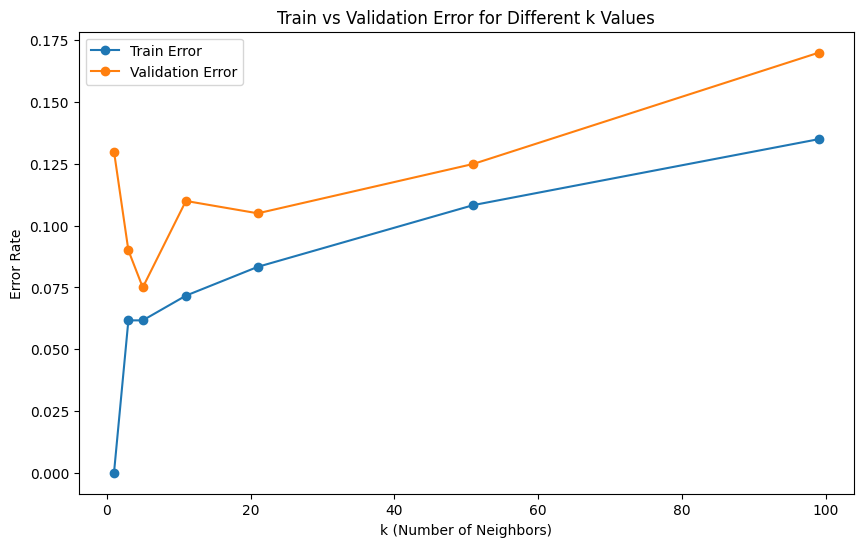

In [40]:
# get sample set of size 1000
X1000, y1000 = generate_data(m=1000)

# generate train set (0.6) and temporary set (0.4)
X_train, y_train, X_temp, y_temp = split(X1000,y1000, 0.4)

# divide temporary set for validation and test sets
X_val, y_val, X_test, y_test = split(X_temp, y_temp, 0.5)


k_values = [1, 3, 5, 11, 21, 51, 99]
train_errors = []
val_errors = []

for k in k_values:
    # Train the KNN classifier
    knn = kNNClassifier_vec(k)
    knn.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy(y_train, y_train_pred)
    train_errors.append(train_error)

    # Predictions on the validation set
    y_val_pred = knn.predict(X_val)
    val_error = 1 - accuracy(y_val, y_val_pred)
    val_errors.append(val_error)

# Plot the training vs validation error
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='o')
plt.title('Train vs Validation Error for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

The minimum error for validation set occurs when k is set to 5. Minimal error for train set is 0 and occurs when k=1 (=overfitted model). 
The error is larger for the validation set; as k increases, the difference between the errors for the train and validation set decreases.

In [41]:
# estimate the generalization error of your chosen classifier using the test set
knn_t = kNNClassifier_vec(5)
knn_t.fit(X_train, y_train)
y_test_pred = knn_t.predict(X_test)
1 - accuracy(y_test, y_test_pred)

0.04500000000000004

The generalization error of the chosen classifier using the test set is 0.14, which is higher than the minimum errors observed for the training and validation sets with a similar value of k. Previously, we observed that there is not a significant distinction in the decision planes for k equal to 5, 11, or 21. Therefore, we can assume that the error results for these k values could be approximately the same and depend on the data set.

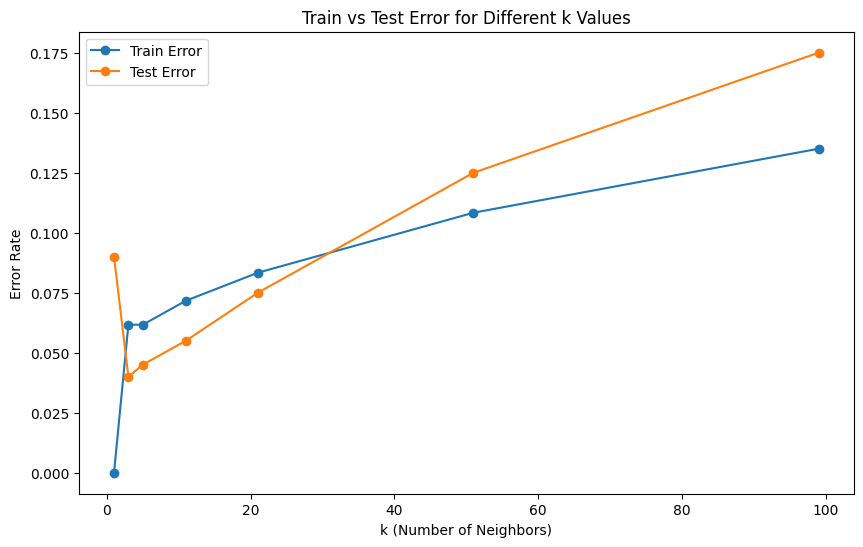

In [42]:
# optimize for test
k_values = [1, 3, 5, 11, 21, 51, 99]
train_errors = []
val_errors = []

for k in k_values:
    # Train the KNN classifier
    knn = kNNClassifier_vec(k)
    knn.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy(y_train, y_train_pred)
    train_errors.append(train_error)

    # Predictions on the validation set
    y_test_pred = knn.predict(X_test)
    val_error = 1 - accuracy(y_test, y_test_pred)
    val_errors.append(val_error)

# Plot the training vs validation error
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, val_errors, label='Test Error', marker='o')
plt.title('Train vs Test Error for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

What would happen if you optimize directly on test? is the optimal k the same?

The k will not stay the same, if we will optimize directly on test the optimal k will be equal to 3

### 3. Using cross validation - 25 points
This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value.
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.

In [16]:
def split_cv(X, y, num_folds, seed=42):
    ''' Split values and labels for sets of required size'''
    random.seed(seed)

    f_size = int(len(X) / num_folds)
    f_len, X_cv, y_cv, f_indices = len(X), [], [], []
 
    for i in range(num_folds):
        f_indices = random.sample(range(f_len), f_size)
        X_train, y_train, X_test, y_test = [], [],[], []
        for i in range(f_len):
            if i in f_indices:
                X_test.append(X[i])
                y_test.append(y[i])
            else:
                X_train.append(X[i])
                y_train.append(y[i])
        X_cv.append(X_test)
        y_cv.append(y_test)
        X, y = X_train, y_train
        f_len -= f_size

    return X_cv, y_cv   

In [78]:
# generate test set (0.2)
X_train, y_train, X_test, y_test = split(X1000,y1000, 0.2)

# generate sets for CV
X_cv, y_cv = split_cv(X_train, y_train, 5)

train_errors = np.array([])
val_errors = np.array([])

for i in range(len(X_cv)):
    X_tmp, y_tmp = X_cv.copy(), y_cv.copy()
    X_testtmp, y_testtmp = X_tmp.pop(i), y_tmp.pop(i)
    X_trainCV, y_trainCV = [], []
    for x, y in zip(X_tmp, y_tmp):
        X_trainCV += x
        y_trainCV += y
    
    #k_values = [1, 3, 5, 7, 9, 11, 21, 51, 99]
    k_values = range(1, 99, 4)

    for k in k_values:
        # Train the KNN classifier
        knn = kNNClassifier_vec(k)
        knn.fit(X_trainCV, y_trainCV)

        # Predictions on the training set
        y_train_pred = knn.predict(X_trainCV)
        train_error = 1 - accuracy(y_trainCV, y_train_pred)
        train_errors = np.append(train_errors, train_error)


        # Predictions on the validation set
        y_test_pred = knn.predict(X_testtmp)
        val_error = 1 - accuracy(y_testtmp, y_test_pred)
        val_errors = np.append(val_errors, val_error)

train_errors = train_errors.reshape(-1,len(k_values))
val_errors = val_errors.reshape(-1,len(k_values))

train_errors_mean = train_errors.mean(axis=0)
val_errors_mean = val_errors.mean(axis=0)

print (train_errors_mean, '\n', val_errors_mean)

[0.        0.045625  0.046875  0.0503125 0.0534375 0.060625  0.065
 0.06875   0.0728125 0.07375   0.07625   0.079375  0.084375  0.0903125
 0.09125   0.0975    0.1       0.1053125 0.1103125 0.110625  0.1146875
 0.1159375 0.1190625 0.12375   0.1259375] 
 [0.085   0.05375 0.0575  0.05625 0.05875 0.06875 0.0725  0.0775  0.0775
 0.08    0.0825  0.08375 0.0875  0.09375 0.095   0.0975  0.1     0.10375
 0.11375 0.11375 0.11125 0.11625 0.12    0.1225  0.12875]


We put aside 0.2 of the data for test set. In each CV iteration we have train set which size is 4/5 of the remaining data and 1/5 - validation set. 

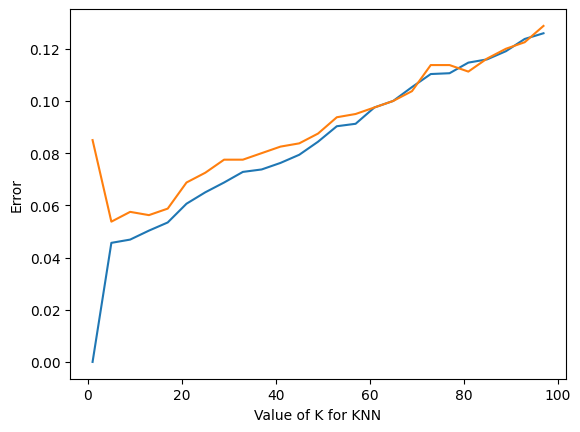

In [79]:
# plot to see clearly
plt.plot(k_values, train_errors_mean)
plt.plot(k_values, val_errors_mean)

plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

## References
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://scott.fortmann-roe.com/docs/MeasuringError.html
- http://scikit-learn.org/stable/modules/cross_validation.html